In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [6]:
#Create objects
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

#Instance of Hands for hands tracking
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

#path to image
img_path = './data_q/0/0.jpg'

#read image
img = cv2.imread(img_path)

#convert image to RGB colorspace 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#process hands tracking
results = hands.process(img_rgb)


In [7]:
results.multi_hand_landmarks

[landmark {
   x: 0.18085182
   y: 0.6267236
   z: -3.8794224e-07
 }
 landmark {
   x: 0.23198107
   y: 0.5922821
   z: -0.016936308
 }
 landmark {
   x: 0.27618137
   y: 0.52787244
   z: -0.023431953
 }
 landmark {
   x: 0.29628226
   y: 0.4490491
   z: -0.029579582
 }
 landmark {
   x: 0.2843083
   y: 0.3907066
   z: -0.03137931
 }
 landmark {
   x: 0.26516473
   y: 0.44226325
   z: -0.00608719
 }
 landmark {
   x: 0.26450026
   y: 0.37616605
   z: -0.031941053
 }
 landmark {
   x: 0.25466993
   y: 0.4460231
   z: -0.043654032
 }
 landmark {
   x: 0.25438902
   y: 0.47966582
   z: -0.047048286
 }
 landmark {
   x: 0.23044649
   y: 0.43442497
   z: -0.006212071
 }
 landmark {
   x: 0.230189
   y: 0.37589663
   z: -0.033408325
 }
 landmark {
   x: 0.22623691
   y: 0.46304548
   z: -0.036947716
 }
 landmark {
   x: 0.22868682
   y: 0.48746452
   z: -0.032608446
 }
 landmark {
   x: 0.19693278
   y: 0.43482685
   z: -0.010577534
 }
 landmark {
   x: 0.19562657
   y: 0.37756535
   z: -0.0

# Draw Hand


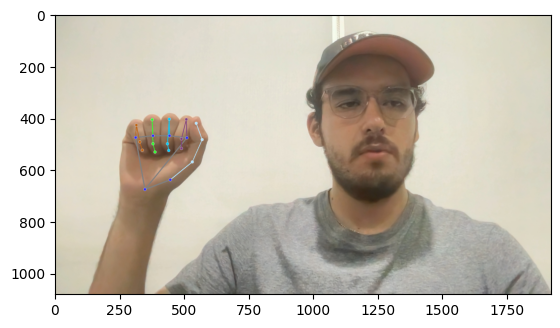

In [9]:
for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
     img_rgb,
     hand_landmarks,
     mp_hands.HAND_CONNECTIONS,
     mp_drawing_styles.get_default_hand_landmarks_style(),
     mp_drawing_styles.get_default_hand_connections_style(),
    )
plt.figure()
plt.imshow(img_rgb)
plt.show()

# Get Points

In [18]:
landmarks_c = []
hand_l = results.multi_hand_landmarks[0]
for i in range(len(hand_l.landmark)):
    x = hand_l.landmark[i].x
    y = hand_l.landmark[i].y

    x_.append(x)
    y_.append(y)
print("Xs",x_)
print("Ys",y_)

Xs [0.18085181713104248, 0.2319810688495636, 0.2761813700199127, 0.29628226161003113, 0.2843083143234253, 0.26516473293304443, 0.2645002603530884, 0.2546699345111847, 0.2543890178203583, 0.2304464876651764, 0.2301889955997467, 0.22623690962791443, 0.22868682444095612, 0.19693277776241302, 0.19562657177448273, 0.19726349413394928, 0.2012770175933838, 0.16228190064430237, 0.16400980949401855, 0.17068752646446228, 0.17552442848682404, 0.18085181713104248, 0.2319810688495636, 0.2761813700199127, 0.29628226161003113, 0.2843083143234253, 0.26516473293304443, 0.2645002603530884, 0.2546699345111847, 0.2543890178203583, 0.2304464876651764, 0.2301889955997467, 0.22623690962791443, 0.22868682444095612, 0.19693277776241302, 0.19562657177448273, 0.19726349413394928, 0.2012770175933838, 0.16228190064430237, 0.16400980949401855, 0.17068752646446228, 0.17552442848682404, 0.18085181713104248, 0.2319810688495636, 0.2761813700199127, 0.29628226161003113, 0.2843083143234253, 0.26516473293304443, 0.2645002

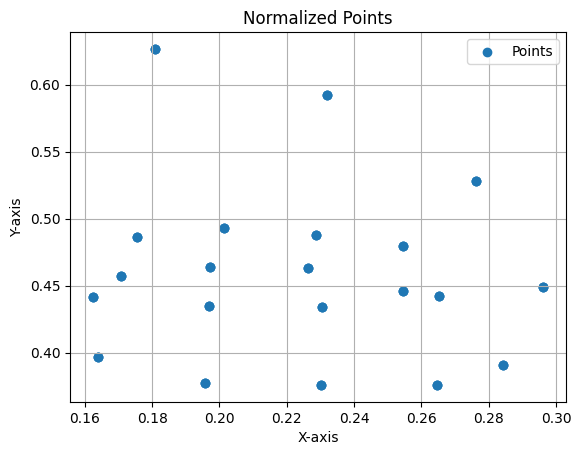

In [20]:
#Graph
# Create a scatter plot
plt.scatter(x_, y_, label="Points")

# Customize the plot (optional)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Normalized Points")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Denormalize points

In [26]:
height, width, _ = img.shape

x_values = [int(x*width) for x in x_]
y_values = [int(y*height) for y in y_]
print(f"Shape {height}*{width}")
print(x_values)
print(y_values)

Shape 1080*1920
[347, 445, 530, 568, 545, 509, 507, 488, 488, 442, 441, 434, 439, 378, 375, 378, 386, 311, 314, 327, 337, 347, 445, 530, 568, 545, 509, 507, 488, 488, 442, 441, 434, 439, 378, 375, 378, 386, 311, 314, 327, 337, 347, 445, 530, 568, 545, 509, 507, 488, 488, 442, 441, 434, 439, 378, 375, 378, 386, 311, 314, 327, 337]
[676, 639, 570, 484, 421, 477, 406, 481, 518, 469, 405, 500, 526, 469, 407, 500, 532, 476, 428, 493, 525, 676, 639, 570, 484, 421, 477, 406, 481, 518, 469, 405, 500, 526, 469, 407, 500, 532, 476, 428, 493, 525, 676, 639, 570, 484, 421, 477, 406, 481, 518, 469, 405, 500, 526, 469, 407, 500, 532, 476, 428, 493, 525]


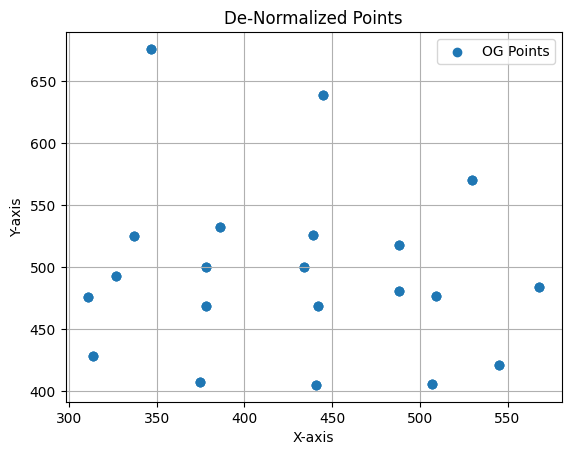

In [27]:
plt.scatter(x_values, y_values, label="OG Points")

# Customize the plot (optional)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("De-Normalized Points")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## We can deduce that scaled points do not affect shape, but also that the iamge is mirrored in the y axis


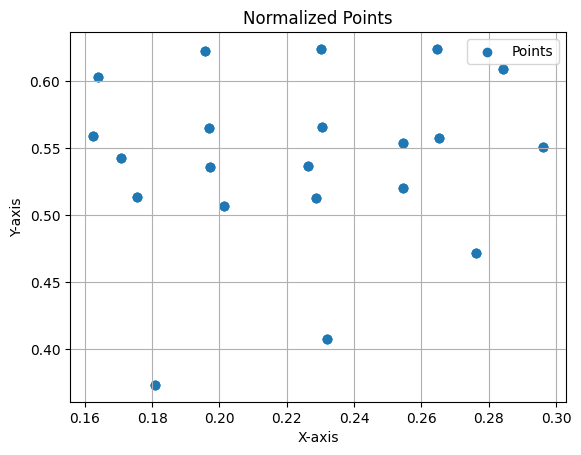

In [30]:

y_values2 = [ 1.0 - y for y in y_]
#Graph
# Create a scatter plot
plt.scatter(x_, y_values2, label="Points")

# Customize the plot (optional)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Normalized Points")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


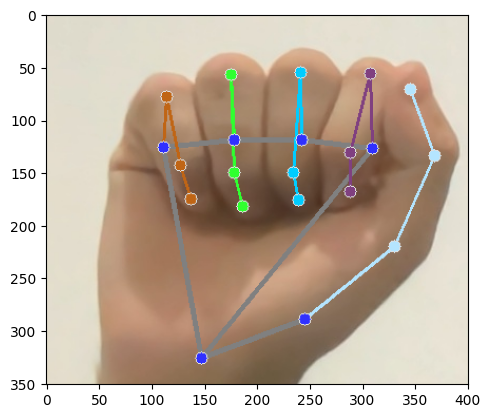

In [32]:
cropped_img = img_rgb[350:701, 200:601, :]

# Create a new figure
plt.figure()

# Display the cropped region of the image
plt.imshow(cropped_img)

# Show the figure
plt.show()